## Step 1: Importing the Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

## Step 2: Data Inspection

In [2]:
train = pd.read_csv(r'C:\Users\freji\Downloads\train_s3TEQDk.csv')
test = pd.read_csv(r'C:\Users\freji\Downloads\test_mSzZ8RL.csv')

In [3]:
train.shape,test.shape

((245725, 11), (105312, 10))

We have 245725 rows and 10 columns in Train set and Test set has 105312 rows and 9 columns.

In [4]:
train.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [5]:
test.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
dtype: object

In [6]:
train.isnull().sum()/train.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [7]:
test.isnull().sum()/test.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

We have 11.93% and 11.89% of missing values in Credit_Product column.


## Step 3: Data Cleaning

All missing values must be filled inorder to obtain a correct predictions. Missing values leads to wrong predictions.

In [8]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [9]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

There are 29325 and 12522 missing values in Credit_Product column on both sets.

Since the Credit_Product is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column.

In [10]:
train['Credit_Product'] = train['Credit_Product'].fillna(train['Credit_Product'].mode()[0])

In [11]:
test['Credit_Product'] = test['Credit_Product'].fillna(test['Credit_Product'].mode()[0])

## Step 4: Exploratory Data Analysis

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [14]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,No,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [15]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [ ]:
train['Occupation']= train['Occupation'].astype(str)

C:\Users\freji\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

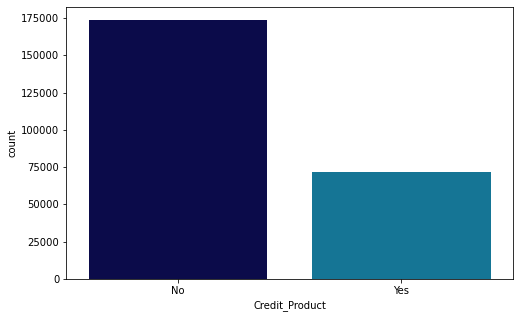

In [16]:
plt.figure(figsize=(8,5))
sns.countplot('Credit_Product',data=train,palette='ocean')

C:\Users\freji\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

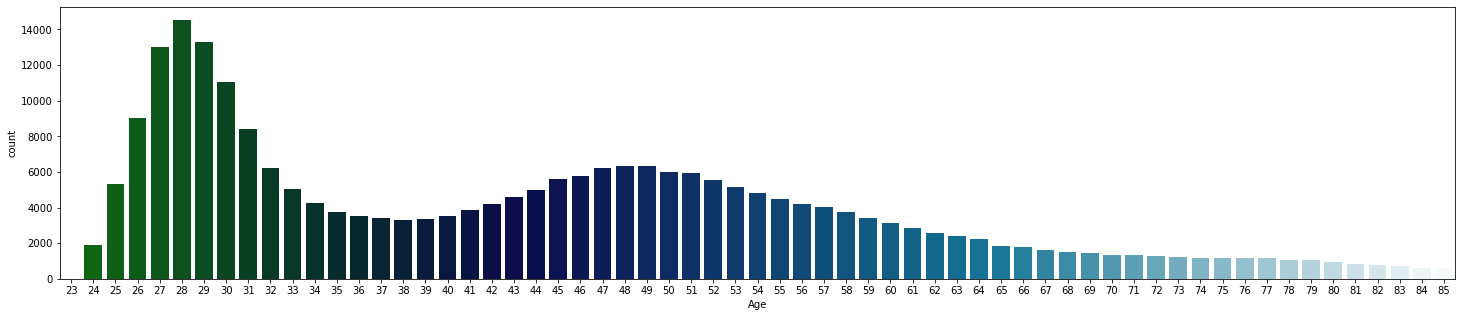

In [17]:
plt.figure(figsize=(25,5))
sns.countplot('Age',data=train,palette='ocean')

C:\Users\freji\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='count'>

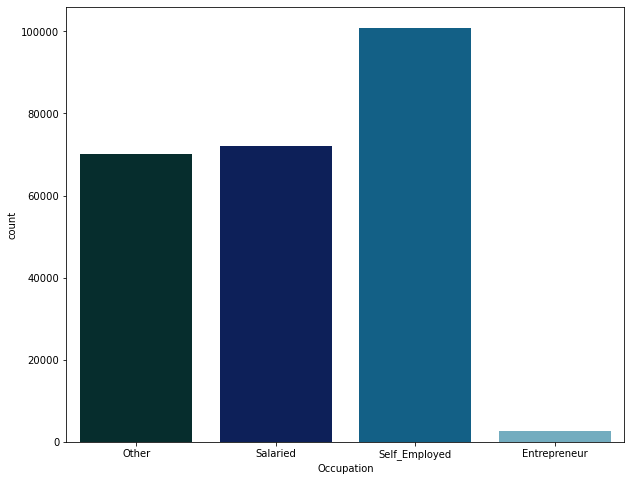

In [21]:
plt.figure(figsize=(10,8))
sns.countplot('Occupation',data=train,palette='ocean')

C:\Users\freji\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Is_Active', ylabel='count'>

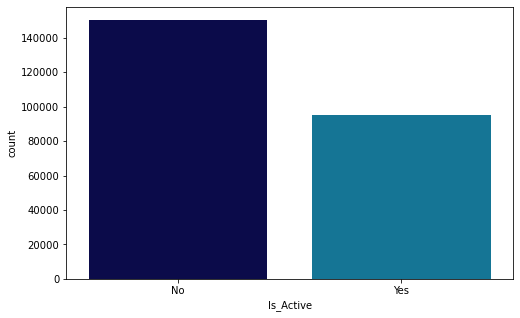

In [20]:
plt.figure(figsize=(8,5))
sns.countplot('Is_Active',data=train,palette='ocean')

## Step 5: Building Model

In [22]:
train.drop('ID',axis=1,inplace=True)

In [23]:
test.drop('ID',axis=1,inplace=True)

In [27]:
# Separating Features and Target
X = train.drop(['Is_Lead'],axis=1)
y = train['Is_Lead']

In [25]:
# Taking 30% data as validation set 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 43)

In [28]:
columns_encode = X_train.columns[X_train.dtypes==object].tolist()

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
col_trans = make_column_transformer((OneHotEncoder(),columns_encode),remainder = "passthrough")

In [30]:
#Building model
from xgboost import XGBClassifier
xb = XGBClassifier()

In [31]:
from sklearn.pipeline import make_pipeline
pipes = make_pipeline(col_trans, xb)
pipes.fit(X_train, y_train)

C:\Users\freji\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:15:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Gender', 'Region_Code',
                                                   'Occupation', 'Channel_Code',
                                                   'Credit_Product',
                                                   'Is_Active'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
y_pred = pipes.predict(X_test)

In [34]:
train_probs = pipes.predict_proba(X_train)[:,1] 
probs = pipes.predict_proba(X_test)[:, 1]
train_predictions = pipes.predict(X_train)

In [35]:
print('Roc_Auc_Score =',roc_auc_score(y_test,y_pred))

Roc_Auc_Score = 0.617016031349377


In [36]:
sample = pd.read_csv(r'C:/Users/freji/Downloads/sample_submission_eyYijxG.csv')
probss = pipes.predict_proba(test)[:, 1]

In [37]:
sample['Is_Lead'] = probss
sample.to_csv('my_submission.csv',index=False)